In [1]:
# execute this cell before you start

import tensorflow as tf
import tensorflow.keras as keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt


print(tf.__version__)
print(tf.keras.__version__)


2.9.2
2.9.0


#  CA1

to submit the assignment, please do the following:

- make sure that the notebook runs through and produces all desired output after `Kernel -> Restart & Run all`
- running through the whole notebook must not take no more than 60 minutes on a standard computer, similar to our lab-computers, without GPU and 8GB of RAM
- similarly, no cell must take longer than 10 minutes 
- do `Cell -> All output -> Clear` to clear all your output
- save the notebook (CA1.ipynb)
- upload the file `CA1.ipynb` to canvas.
- note that Google Colab ipynb files do not work with the nbgrader system I use to grade assignments and are therefore not allowed. 
- Please use markdown cells extensively, as you receive marks for explaining your observations.  Show your understanding!
- If you only use code cells, you do not receive marks.
- It is fine (but not required) to look for code on the Internet, in particular as a starting point.  However, this must be explicitly documented! You need to precisely say, which sources you used.  You do not need to cite code taken from the lecture notes, however, you need to cite, if you use code which is linked or cited in the lecture notes.


# Q1 The MNIST data

It seems that no course on Machine Learning is complete, without training a network on the famous [MNIST dataset](https://en.wikipedia.org/wiki/MNIST_database) of handwritten digits.  You can access them through `keras.datasets.mnist.load_data()`.

The tasks for the first assignment is therefore:

a) (2 marks) Reproduce the results of L03, but now use the original MNIST dataset.  Comment on your observations on the differences between the datasets.

## Loading MNIST dataset directly from Tensorflow

In [2]:
(train_images, train_labels), (test_images, test_labels) = keras.datasets.mnist.load_data()

In terms of the size of datasets, Fashion MNIST and the original MNIST are equivalent.

There are 60,000 28x28 grayscale images, along with a 10,000 set of test images:

In [3]:
train_images.shape, type(train_images)

((60000, 28, 28), numpy.ndarray)

In [4]:
test_images.shape, type(test_images)

((10000, 28, 28), numpy.ndarray)

There are 60000 training labels, one for each training image. 

The labels are numbers from 0 to 9 (10 in total). 

Each number label corresponds to specific handwritten number image.

In [5]:
train_labels.shape, type(train_labels)

((60000,), numpy.ndarray)

In [6]:
max(train_labels)

9

For more convinient access to train_labels of different handwritten number images, the code below is executed:

In [7]:
class_names = ['0', '1', '2', '3', '4', 
               '5', '6', '7', '8', '9']

Normalization of data is performed. It is rescaled so it's within the 0-1 range.

Same normalization was done in the Fashion MNIST example.

In [8]:
train_images = train_images / 255.0

test_images = test_images / 255.0

## Building the model

In [9]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

Input layer (Flatten) specifies  28x28. Input for each handwritten number image will be processed as 784 individual channels.

Their output is relayed to the 128 nodes in the hidden layer (Dense).

The last layer (output i.e. softmax) processes input from the previous layer. Each of the 10 nodes contains a probability that that label (0-9) belongs to the specified handwritten number image.

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


The summary of the model network is the same as in Fashion MNIST since the layers have been built the same way.

No parameters to train in the flatten layer.

The Dense layer has 100,480 parameters to train. The 784 outputs from the previous (flatten) layer are connected with 128 inputs in current layer (dense), with each of the 128 nodes having its bias parameter. Overall, (784+1) x 128 = 101,480 parameters to train.

Softmax layer has (128 (i.e. output from previous layer) + 1 (i.e. bias of the 10 softmax nodes)) x 10 (nodes of the softmax layer), totalling to 1,290 parameters to tune.

## Compiling the model

In [11]:
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy',
              # loss = 'mean_squared_error'
              metrics=['accuracy'])

Optimizer is an algorithm that determies how the model adjusts the parameters (weights and biases) of the model during training as to minimize the loss function.

Loss function quantifies how well the neural network models the training data. The model is trained on data examples (inputs) which have labels (output). The aim is for the model to learn the input-output mappings well in order to be able to perform effectivly on unseen data. Overall, loss function measures the difference between the predicted output of the model and the true output for each training example.

Accuracy is specified as a metric to follow during training, but it is not used to train weights.
It represents the proportion (%) of images which have been correctly labelled.

## Training the built network

In [12]:
model.fit(train_images, train_labels, epochs = 5)

Epoch 1/5
1875/1875 [==============================] - 9s 4ms/step - loss: 0.2501 - accuracy: 0.9286
Epoch 2/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1129 - accuracy: 0.9661
Epoch 3/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0776 - accuracy: 0.9768
Epoch 4/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0566 - accuracy: 0.9831
Epoch 5/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0451 - accuracy: 0.9862


An epoch represents one training session of the neural network with all the training data. It is made up of batches, where a part of the dataset is used to train the neural network. 

This model is being trained on 1875 images in 32 batches (default batch size is 32); Therefore 1875 x 32 = 60,000 images from the training images set. 

With each following epoch, the loss decreased (from 0.26 to 0.0459), whilst the training accuracy improved (from 92.49% to 98.61%). 

## Evaluation of test data using the trained network

In [13]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

print('Test accuracy:', test_acc)

313/313 [==============================] - 1s 4ms/step - loss: 0.0854 - accuracy: 0.9739
Test accuracy: 0.9739000201225281


From evaluation of the model on the test data, it seems that loss is higher (0.0809), as compared to the loss achieved during training (0.0451).

The obtained test accuracy is 97.53%. So, the accuracy of predictions from test images is lower compared to training accuracy.

It is not unusual for the test loss to be higher, or for the test accuracy to be lower, than the training metrics. This is because the model has not seen the test data during training, and has not been therefore optimized for it. However, the difference between the test and training losses should not be too large, as this would indicate a problem with the model's ability to generalize on new data.

Values from the Fashion MNIST network:

Epoch 1/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.4995 - accuracy: 0.8246

Epoch 2/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3751 - accuracy: 0.8651

Epoch 3/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3358 - accuracy: 0.8765

Epoch 4/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3100 - accuracy: 0.8856

Epoch 5/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2940 - accuracy: 0.8909

--------------------------------------------------------------------------------------------------------------------

313/313 [==============================] - 1s 4ms/step - loss: 0.3393 - accuracy: 0.8784
Test accuracy: 0.8784000277519226

--------------------------------------------------------------------------------------------------------------------

The training time was the same in both the fashion and original network (7s 4ms/step for each epoch)

The Fashion MNIST network had a test accuracy of 87.84%. This is a lower score compared to the values obtained from the original MNIST network (test accuracy 97.53%). The percentage of images correctly labelled in the original MNIST network is higher than in the Fashion one. 

In both the original and fashion MNIST example, the loss decreased during training, meaning that the network became more confident in correctly labelling its input data. 

The original MNIST example has a final test loss of 0.0824, with the same network architecture, same number of epoches and batch size as the Fashion MNIST. It is clear that the original MNIST network's low loss value indicates that there are fewer errors in the model, unlike in the fashion MNIST example (loss: 0.3393). 
The smaller the loss, the more correct is the network at modeling the relationship between the input data and the output.

## Part b)

b) (5 marks) How can you improve the performance of the network? Here some suggestions of what you can try
   - Change the number of nodes in the hidden layer
   - Use a different loss function
   - Use a different optimizer
   - change the number of epochs
   - change the batch size
   - play with a dropout layer
   - work with two hidden layers
   - work with three hidden layers
   
Explain the effect of changing parameters in your own words and draw conclusions about how performance improves.  The mark for this part will depend on the overall insight demonstrated.  Code alone does not yield marks. 
Note that one aspect of performance is required training time.  Do not use code cells which take longer than 10 minutes to run on standard CPU based hardware. (Also don't use code which exceeds standard memory requirements of about 8GB RAM, but that should not be an issure here)



## Function to compile and evaluate different parameters of the network

The model built in Q1 a) will be used with certain parameters tweaked as to try and improve the performance of the network. To allow for easier manipulation of these parameters, a function compile_train_eval was developed.

In addition, it is useful to monitor the performance of the model throughout its training (for each epoch). Considering that the test dataset is hidden until the final training performance of the model needs to be evaluated, it is useful to divide the training set into 2 batches- the training set and the validation set.

Following from the principle in L04 where ~40% of the training data was obtained as the validation data, x_val will take the first 24,000 samples of the 60,000 training set. 
This will be used to validate the progress, without obstructing the evaluation process by using the test data set.
Therefore, the remainder ([train_N:]), after the 24,000 is obtained, is the actual training data.

Furthermore, it is convinient to plot the performance monitoring so this is implemented within the function as well.

In [14]:
def compile_train_eval(model, optimizer, loss, batch_size, epochs):
    
    #printing of the overview of the network architecture
    model.summary()
    
    #compilation of the model
    model.compile(optimizer = optimizer, 
              loss = loss,
              metrics = ['accuracy'])
    print('Training of the network')
    
    #dividing the testing set into 2 batches (testing and validation) in order to be able to observe the training performance: 
    train_N = 24000
    x_val = train_images[:train_N] #validation set
    partial_x_train = train_images[train_N:] #remaining testing set

    y_val = train_labels[:train_N]
    partial_y_train = train_labels[train_N:]
    
    #training with the testing and validation set
    history = model.fit(partial_x_train, partial_y_train, epochs=epochs, 
                    batch_size=batch_size, validation_data=(x_val, y_val), verbose=1)
    
    #model.fit() returns a History object as a dictionary which monitored what happened in each epoch of training
    history_dict = history.history
    acc = history_dict['accuracy']
    val_acc = history_dict['val_accuracy']
    loss = history_dict['loss']
    val_loss = history_dict['val_loss']

    epochs = history.epoch
    
    plt.figure(figsize=[10,9])
    
    #to be able to visually monitor loss during training:
    plt.subplot(2, 1, 1)
    # "co--" is for "cyan circle dashed line"
    plt.plot(epochs, loss, 'co--', label='Training loss')
    # 'mv' is for "solid magenta line with triangles"
    plt.plot(epochs, val_loss, 'mv-', label='Validation loss')
    plt.title('Training and validation loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.subplot(2, 1, 2)
    #to be able to visually monitor accuracy from training:    
    plt.plot(epochs, acc, 'co--', label='Training acc')
    plt.plot(epochs, val_acc, 'mv-', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.tight_layout() #to adjust for overlapping subplot labels
    
    plt.show()
    
    print('------------------------------------------------------------')
    #to evaluate network and see its performance on unseen test data:
    test_loss, test_acc = model.evaluate(test_images, test_labels)

# Experimenting with different values of evaluate function parameters

## Reference model

Firstly, the network from part a) is recreated with the adjustment of having a testing and validation set, as to be able to follow through on the performance of the network;
In following descriptions, this model will be refered to as the 'reference model'.

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________
Training of the network
Epoch 1/5
1125/1125 [==============================] - 6s 5ms/step - loss: 0.0353 - accuracy: 0.9891 - val_loss: 0.0354 - val_accuracy: 0.9885
Epoch 2/5
1125/1125 [==============================] - 6s 5ms/step - loss: 0.0257 - accuracy: 0.9927 - val_loss: 0.0465 - val_accuracy: 0.9845
Epoc

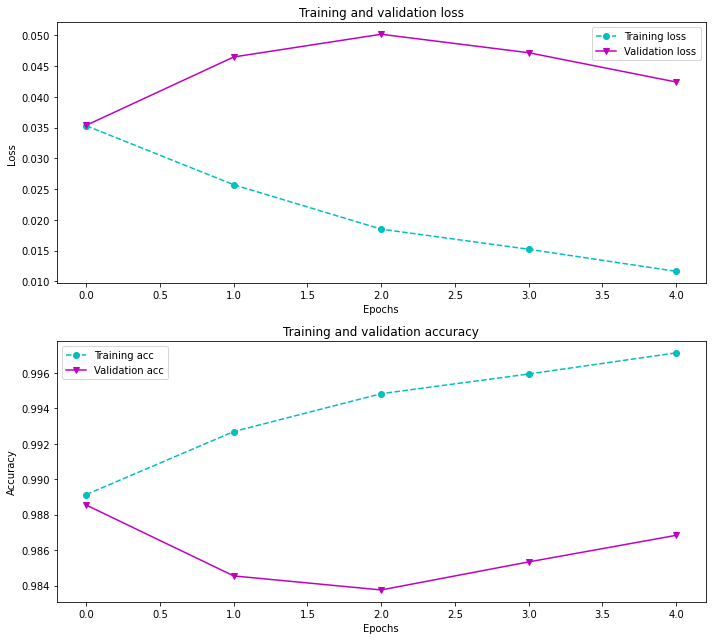

------------------------------------------------------------
313/313 [==============================] - 1s 4ms/step - loss: 0.0782 - accuracy: 0.9787


In [15]:
compile_train_eval(model, optimizer = 'adam', loss= 'sparse_categorical_crossentropy', batch_size=32, epochs= 5)

First of all, it appears that only after 1 epoch, the created model being to overfit. This happens when the model remembers the training data better and better, but does not learn from it - performs worse on previously unseen inputs than it does on the training data as it only learned one thing really well and it can't generalize.

The training loss continues decreasing with each following epoch, as the training accuracy increases. However, what is noticeable is that the validation loss actually begins increasing after the 1st epoch, while its accuracy simultaneously decreases.

Removing part of the testing data in order to create the validation set reduces the number of samples that the network is trained on. This is presumably the reason for why the network of almost the same build is performing a bit worse when it comes to loss (0.0919 VS. 0.0700 in part a)) and accuracy (97.38% VS. 97.82% in part a)).

## Changing batch size

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________
Training of the network
Epoch 1/5
4500/4500 [==============================] - 25s 5ms/step - loss: 0.0295 - accuracy: 0.9894 - val_loss: 0.0718 - val_accuracy: 0.9795
Epoch 2/5
4500/4500 [==============================] - 24s 5ms/step - loss: 0.0264 - accuracy: 0.9908 - val_loss: 0.0911 - val_accuracy: 0.9744
Ep

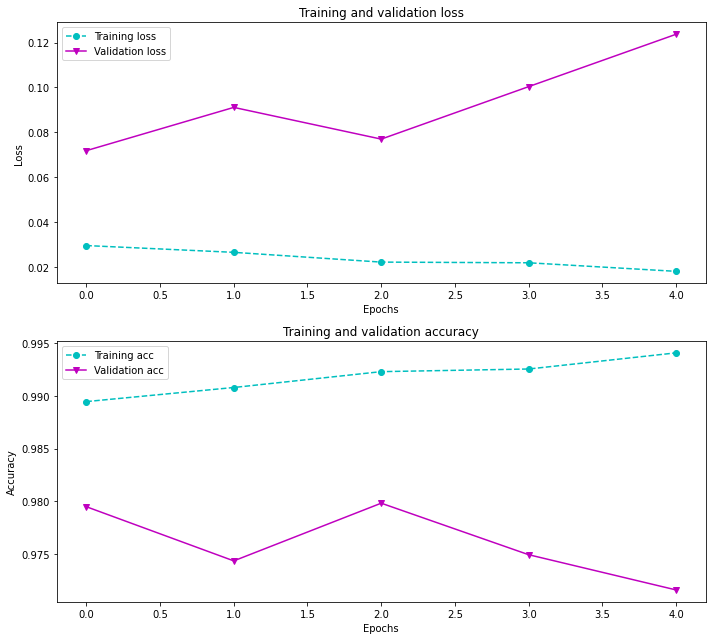

------------------------------------------------------------
313/313 [==============================] - 1s 4ms/step - loss: 0.1529 - accuracy: 0.9659


In [16]:
#quarter of default batch_size 
compile_train_eval(model, optimizer = 'adam', loss= 'sparse_categorical_crossentropy', batch_size=8, epochs= 5)

Above is computed the changing of batch size to quarter of what it was in part a) ie. the batch_size now is 8.
Batch size influences the training time, so reducing the batch size lead to slower training epochs with 4500 images loaded in in each batch.

Model is being trained on 8 batches of 4500 images each (4500 x 8 = 36,000 images from the training images set)

First noticable thing is that the time it takes for one epoch to run is significantly longer (32s VS 9s in reference model above)

This model modification follows a similar pattern as above.

From evaluation, it can be seen that this networks performs worse as its loss is higher (0.1236 VS reference model) and its accuracy lower.


Considering how tweaking the batch size to be smaller did not yield better performances, it's useful to see how increasing it will perform:

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________
Training of the network
Epoch 1/5
282/282 [==============================] - 2s 7ms/step - loss: 0.0049 - accuracy: 0.9983 - val_loss: 0.0710 - val_accuracy: 0.9832
Epoch 2/5
282/282 [==============================] - 2s 6ms/step - loss: 0.0012 - accuracy: 0.9998 - val_loss: 0.0671 - val_accuracy: 0.9843
Epoch 3/

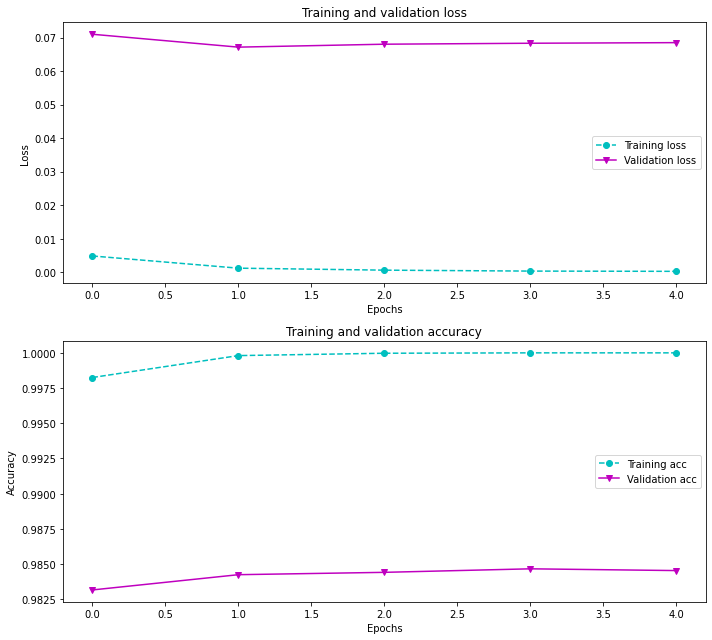

------------------------------------------------------------
313/313 [==============================] - 1s 4ms/step - loss: 0.0967 - accuracy: 0.9797


In [17]:
#4 times bigger batch_size than default
compile_train_eval(model, optimizer = 'adam', loss= 'sparse_categorical_crossentropy', batch_size=128, epochs= 5)

This model was significantly faster to compute. 

However, with a batch size this big, the model seems to be overfitting, so new data won't be predicted well since large batches tend to converge to sharp minima of the training function, which tend to generalize less well.

The loss from evaluation seems to be the best so far in comparison to the reference model (loss: 0.0919, accuracy: 97.38%), however this still is not an improvement to the reference model.

## Changing number of epochs

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________
Training of the network
Epoch 1/2
1125/1125 [==============================] - 7s 6ms/step - loss: 0.0044 - accuracy: 0.9986 - val_loss: 0.0973 - val_accuracy: 0.9793
Epoch 2/2
1125/1125 [==============================] - 6s 6ms/step - loss: 0.0024 - accuracy: 0.9994 - val_loss: 0.0802 - val_accuracy: 0.9831


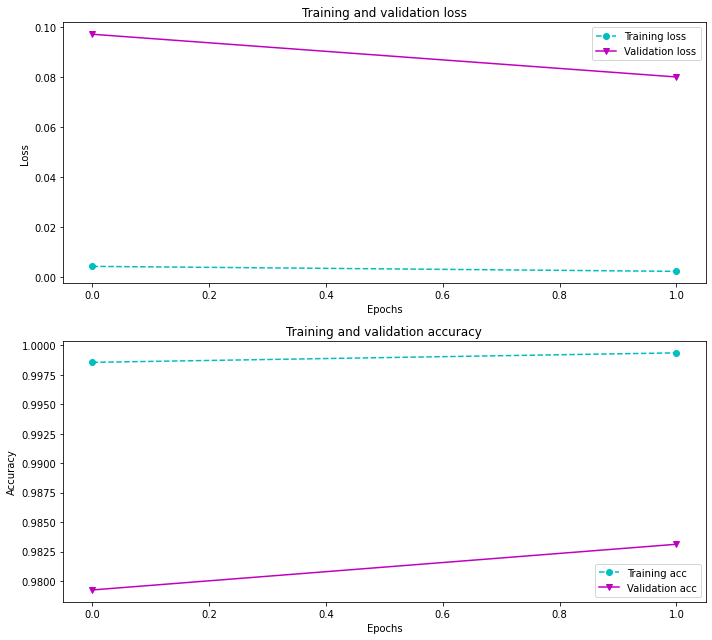

------------------------------------------------------------
313/313 [==============================] - 1s 4ms/step - loss: 0.1057 - accuracy: 0.9793


In [18]:
#computing the network with 2 epoch
compile_train_eval(model, optimizer = 'adam', loss= 'sparse_categorical_crossentropy', batch_size=32, epochs= 2)

If the number of epochs is too low, the training will stop even before the model converges. What is meant by this is that the loss reaches its minimum - the errors produced by the model in training comes to a minimum.

Not having enough epochs doesnt give a reliable view of when the model reaches this minimum - from the reference model it can be confidently seen that indeed the minimum is achieved after first epoch.

Regardless, considering the preview of training with 25 epochs below, it was noticed that another dip happened after the second epoch. 

With each new epoch, the weights are adjusted. Therefore, to reliably consider the weights adjustments through all epochs, a reasonable number of epochs is necessary. 

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________
Training of the network
Epoch 1/25
1125/1125 [==============================] - 6s 6ms/step - loss: 0.0048 - accuracy: 0.9985 - val_loss: 0.0933 - val_accuracy: 0.9817
Epoch 2/25
1125/1125 [==============================] - 6s 6ms/step - loss: 0.0023 - accuracy: 0.9992 - val_loss: 0.0951 - val_accuracy: 0.9807
Ep

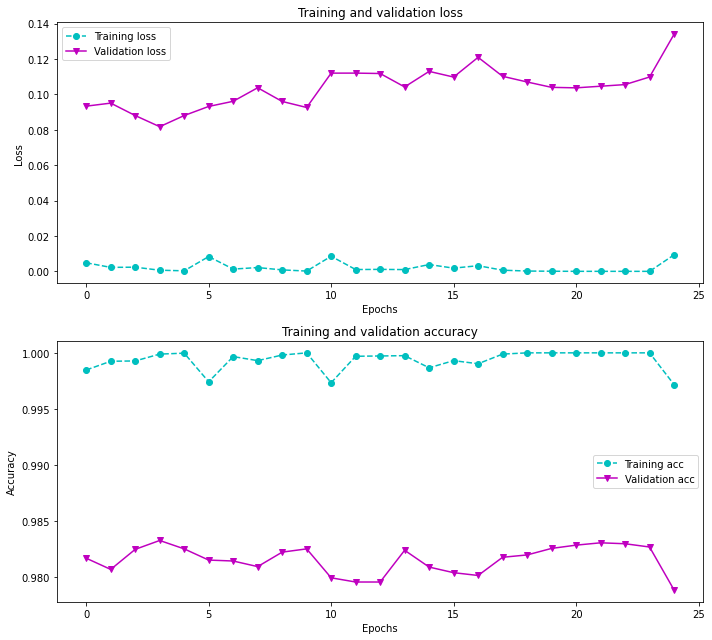

------------------------------------------------------------
313/313 [==============================] - 1s 4ms/step - loss: 0.1607 - accuracy: 0.9748


In [19]:
#computing the network with 25 epoch
compile_train_eval(model, optimizer = 'adam', loss= 'sparse_categorical_crossentropy', batch_size=32, epochs= 25)

The above model was tested to see how a large number of epochs performs despite that from previous tests it was seen reliably that epochs over 5, as in the reference model, are not neccesary since the model begins to overfit. 

## Variable number of hidden layers

Training with different number of hidden layers seems like a possible approach to improve the performance of the network.

Therefore, the function below modifies the build of the model. 

Note: The same number of nodes has been maintained (128) like in question 1a, as well as the activation function (ReLU).

In [20]:
def add_dense_layer(layer_count):
    model = tf.keras.Sequential()
    model.add(tf.keras.layers.Flatten(input_shape=(28, 28)))
    
    for s in range(len(layer_count)): 
        model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
    
    model.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax))
    return model

While building the model the number of hidden(dense) layers can be altered (by specifing the count as the input value) in the for loop cell.

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_2 (Dense)             (None, 128)               100480    
                                                                 
 dense_3 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________
Training of the network
Epoch 1/5
1125/1125 [==============================] - 7s 6ms/step - loss: 0.3255 - accuracy: 0.9072 - val_loss: 0.1858 - val_accuracy: 0.9467
Epoch 2/5
1125/1125 [==============================] - 6s 6ms/step - loss: 0.1526 - accuracy: 0.9558 - val_loss: 0.1359 - val_accuracy: 0.9599
Ep

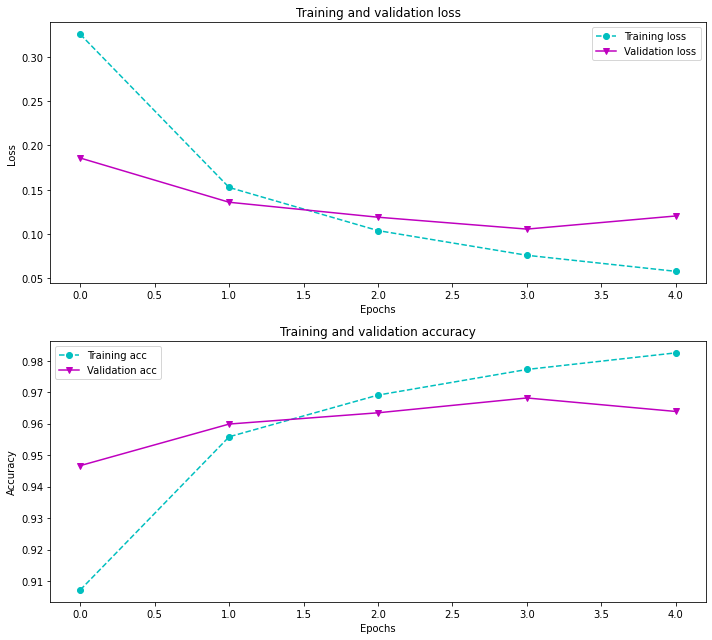

------------------------------------------------------------
313/313 [==============================] - 1s 4ms/step - loss: 0.1125 - accuracy: 0.9655
Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense_4 (Dense)             (None, 128)               100480    
                                                                 
 dense_5 (Dense)             (None, 128)               16512     
                                                                 
 dense_6 (Dense)             (None, 10)                1290      
                                                                 
Total params: 118,282
Trainable params: 118,282
Non-trainable params: 0
_________________________________________________________________
Training of the network
Epoch 

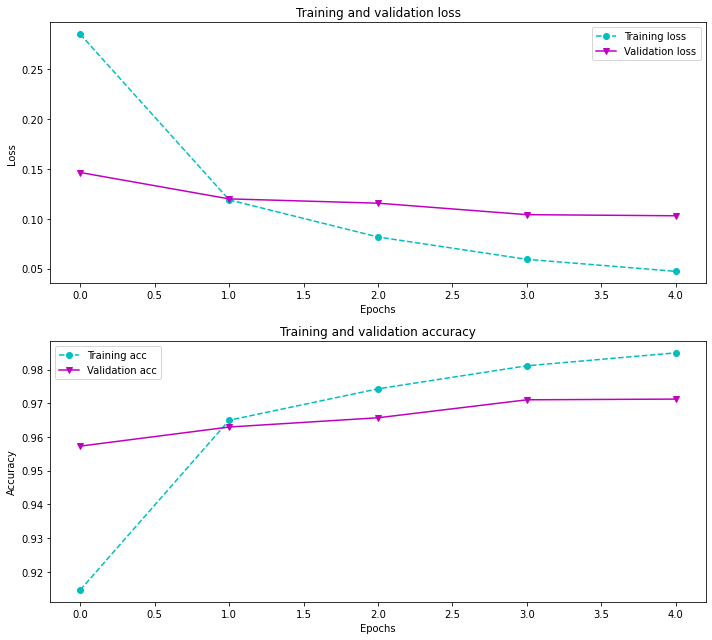

------------------------------------------------------------
313/313 [==============================] - 1s 4ms/step - loss: 0.0899 - accuracy: 0.9726
Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 784)               0         
                                                                 
 dense_7 (Dense)             (None, 128)               100480    
                                                                 
 dense_8 (Dense)             (None, 128)               16512     
                                                                 
 dense_9 (Dense)             (None, 128)               16512     
                                                                 
 dense_10 (Dense)            (None, 10)                1290      
                                                                 
Total params: 134,794
Trainable para

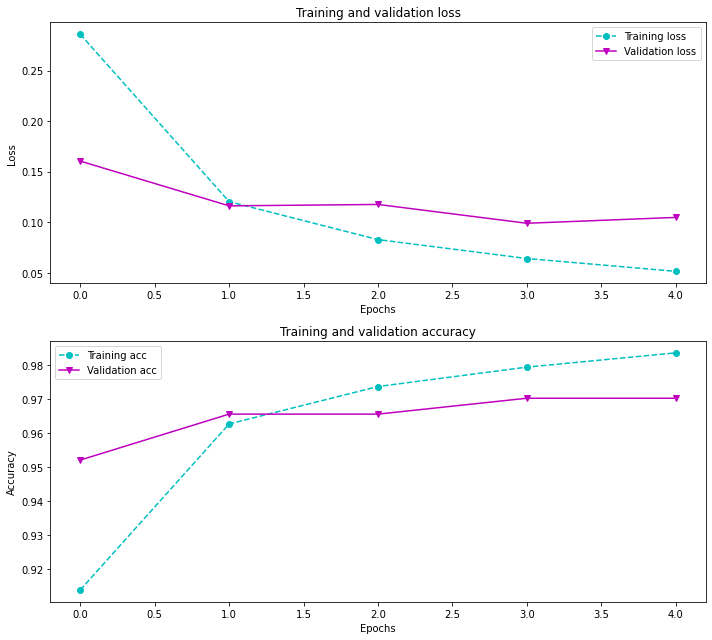

------------------------------------------------------------
313/313 [==============================] - 2s 5ms/step - loss: 0.1052 - accuracy: 0.9702
Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_4 (Flatten)         (None, 784)               0         
                                                                 
 dense_11 (Dense)            (None, 128)               100480    
                                                                 
 dense_12 (Dense)            (None, 128)               16512     
                                                                 
 dense_13 (Dense)            (None, 128)               16512     
                                                                 
 dense_14 (Dense)            (None, 128)               16512     
                                                                 
 dense_15 (Dense)            (None, 

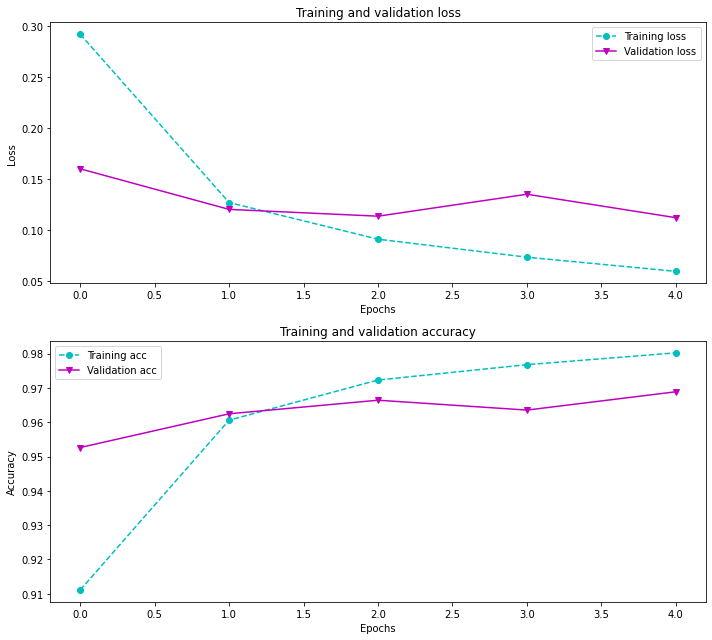

------------------------------------------------------------
313/313 [==============================] - 2s 4ms/step - loss: 0.1196 - accuracy: 0.9680


In [21]:
for layers in range(1, 5):
    model = add_dense_layer([128] * layers)
    compile_train_eval(model, optimizer = 'adam', loss= 'sparse_categorical_crossentropy', batch_size=32, epochs= 5)

Multiple neural networks of increasing depth (number of layers 1-->5) have been trained and evaluated, each with 128 nodes per hidden layer. With each additional layer, the computation time took longer overall with having more parameters to train.

It seems like the network with the best performance was one with one hidden layer with the lowest test loss value and highest accuracy. Increasing number of hidden layers leads to an increased tendency to overfit the training data, as can be seen from the error on training data decreasing by little, but the error on the test data increasing relatively high. 

All in all, it suffices to use a model with one hidden layer, as in the reference model. 

## Altered number of nodes in hidden layer

In an another attempt to improve performance of the reference model, the number of nodes in the hidden layer can be altered.

The build of the network below has been tweaked such that the hidden layer has 256 nodes i.e. 4x of what was in the reference model. 

In [22]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(256, activation=tf.nn.relu),
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_5 (Flatten)         (None, 784)               0         
                                                                 
 dense_16 (Dense)            (None, 256)               200960    
                                                                 
 dense_17 (Dense)            (None, 10)                2570      
                                                                 
Total params: 203,530
Trainable params: 203,530
Non-trainable params: 0
_________________________________________________________________
Training of the network
Epoch 1/5
1125/1125 [==============================] - 8s 7ms/step - loss: 0.2824 - accuracy: 0.9176 - val_loss: 0.1669 - val_accuracy: 0.9515
Epoch 2/5
1125/1125 [==============================] - 7s 7ms/step - loss: 0.1226 - accuracy: 0.9633 - val_loss: 0.1211 - val_accuracy: 0.9645
Ep

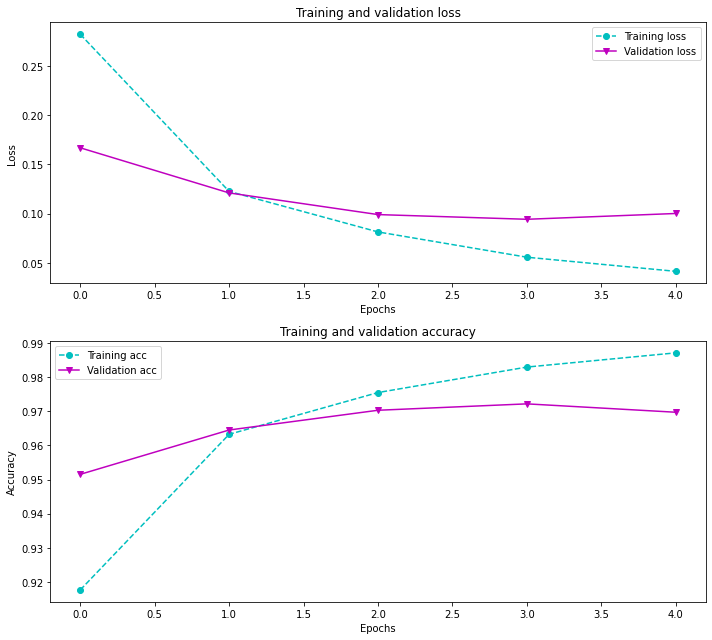

------------------------------------------------------------
313/313 [==============================] - 1s 4ms/step - loss: 0.0894 - accuracy: 0.9716


In [23]:
compile_train_eval(model, optimizer = 'adam', loss= 'sparse_categorical_crossentropy', batch_size=32, epochs= 5)

There has been significantly more parameters to train as the number of nodes was increased. (from 101,770 to 203,530). A trade-off is that an increased number of neurons in the hidden layers adds to the compututation time to train the network.

Performance seemed to get worse after 1 epoch, as was the case with the reference model.

The test loss was 0.811 and its accuracy 97.54%, compared to the loss of 0.0919 and accuracy of 0.9738. First sign of improvement, hooray!

The built network impoved its performance in modelling the relationship between the input data and its output. 


To demonstrate how decreasing the number of nodes in the hidden layer impacts the performance, a network with 32 nodes (half of the refrence) is built, trained and evaluated. 

In [24]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(32, activation=tf.nn.relu),
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_6 (Flatten)         (None, 784)               0         
                                                                 
 dense_18 (Dense)            (None, 32)                25120     
                                                                 
 dense_19 (Dense)            (None, 10)                330       
                                                                 
Total params: 25,450
Trainable params: 25,450
Non-trainable params: 0
_________________________________________________________________
Training of the network
Epoch 1/5
1125/1125 [==============================] - 8s 6ms/step - loss: 0.4217 - accuracy: 0.8849 - val_loss: 0.2691 - val_accuracy: 0.9243
Epoch 2/5
1125/1125 [==============================] - 7s 6ms/step - loss: 0.2254 - accuracy: 0.9353 - val_loss: 0.2090 - val_accuracy: 0.9402
Epoc

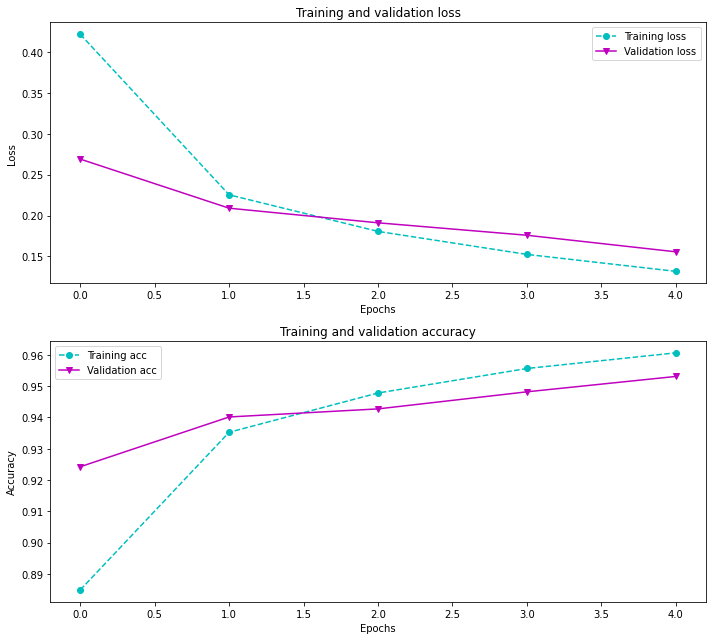

------------------------------------------------------------
313/313 [==============================] - 1s 4ms/step - loss: 0.1472 - accuracy: 0.9544


In [25]:
compile_train_eval(model, optimizer = 'adam', loss= 'sparse_categorical_crossentropy', batch_size=32, epochs= 5)

As expected, with fewer nodes, less parameters are trained and the network performs worse.

Test loss is higher (0.1355) and accuracy lower compared to the refrence model. This is not tremendously bad, but with fewer and fewer nodes, there is a risk of underfitting - too few neurons in the hidden layers which can appropriately detect the output from the input data.

## PART C

c) (3 marks) Write your student number on paper and take a photo. How well are the individual digits recognized? (Hint: you need to convert the photo first into the desired format, and there are many ways to do this.  You are expected to read up on a suitable way yourself, and describe how you did it. Also upload the file of the photo with your solution, so that your notebook runs through. Use relative paths, when you refer to the photo file. 



## Intro

From https://www.tensorflow.org/datasets/catalog/mnist, it was found that the features decorating the images in the MNIST dataset are the following:

'image': Image(shape=(28, 28, 1), dtype=uint8)


Note: L10 from AM6020 on OpenCV, as well as the documentation from OpenCV's website (https://docs.opencv.org/4.x/d2/d96/tutorial_py_table_of_contents_imgproc.html) have been used as reading on how to prepare the photo of handwritten digits

## Loading and start to pre-processing of image

In [26]:
import cv2 as cv
import numpy as np

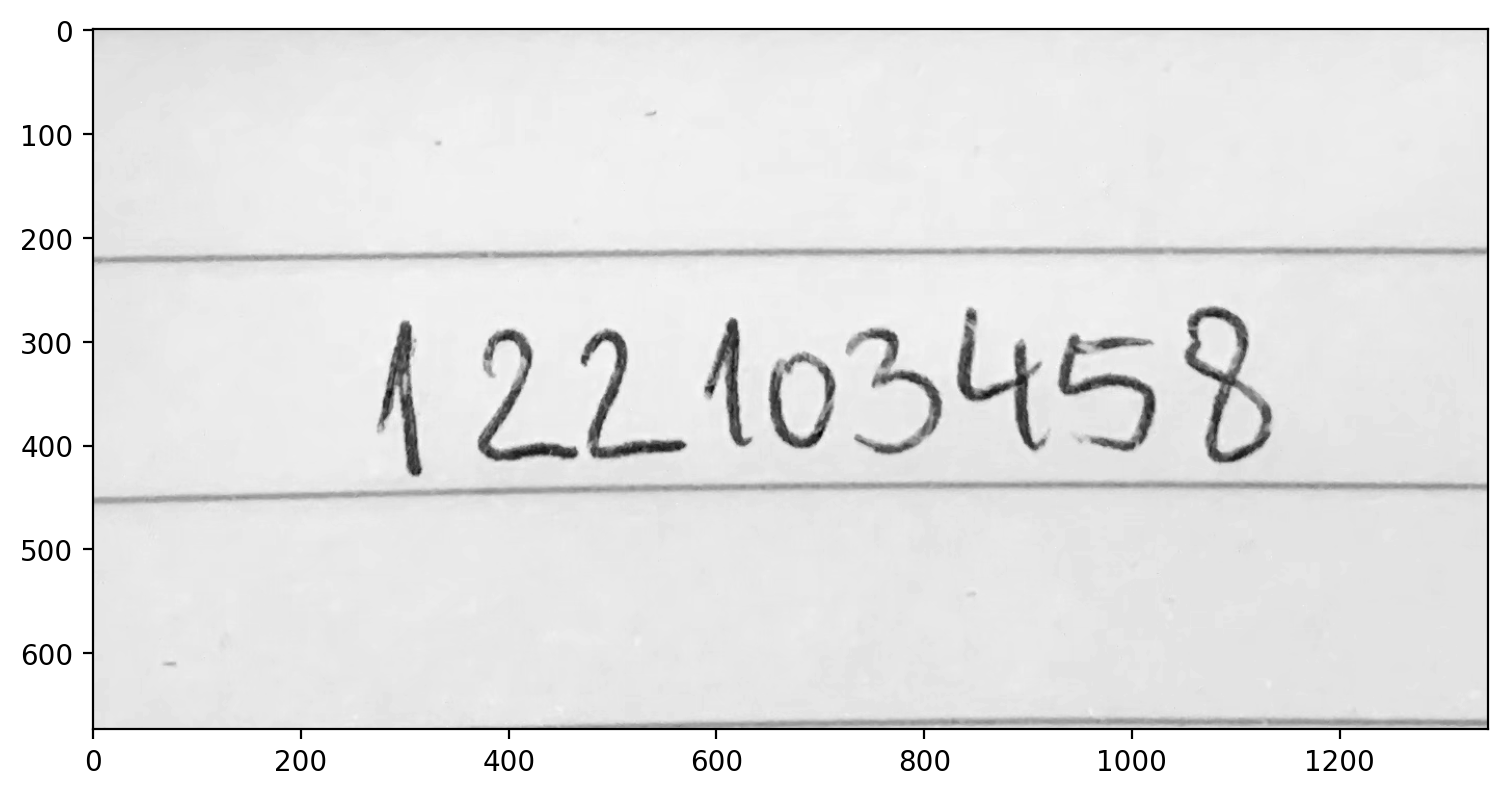

In [93]:
digits = cv.imread('/Users/nadja/Desktop/IMG_6080.png',cv.IMREAD_GRAYSCALE) 

plt.figure(figsize=(9,6),dpi=200)
plt.imshow(digits, cmap = 'gray')
plt.show()

In [94]:
digits.shape

(673, 1343)

Loading of an image through OpenCV does so via an import as a numpy array. 
To recreate the features of images of digits like in the MNIST dataset, the photo must be converted to greyscale. This will make the manipulation of the image easier as there will be only one channel to handle.

The numbers 673 x 1343 are organized as Width x Height of the image. 

Since the digits are written in black on white background, and in order to comply with the guidelines of the MNIST dataset, applying adaptive thresholding will convert the grayscale image into a binary one with black background/white digits format:

In [95]:
digits_bit = cv.adaptiveThreshold(digits, 255, cv.ADAPTIVE_THRESH_GAUSSIAN_C, cv.THRESH_BINARY, 11, 2)

{cite: https://docs.opencv.org/4.x/d7/d4d/tutorial_py_thresholding.html}


Overall, a black pixel is transformed into white and white into black. 

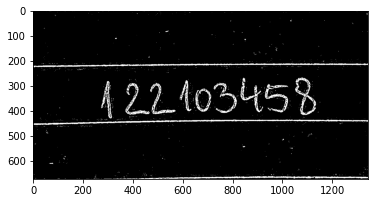

In [97]:
plt.imshow(digits_bit, cmap = 'binary')
plt.show()

## Image cropping

Manual cropping of individual digits from the image has been conducted.

Seeing the coordinates of digit '1', a rectangle with coordinates for the x and y-axis estimated by eye has been specified.

x1 represents the left side of the rectangle (vertical left i.e. column-wise), x2 the right, y1 the top (horizontal top i.e. row-wise) and y2 the bottom edge of the rectangle.

Cropping the image was done as below:

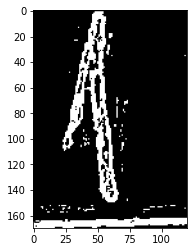

In [98]:
x1 = 250
x2 = 370
y1 = 280
y2 = 450

crop_digit_1 = digits_bit[y1:y2, x1:x2]

plt.imshow(crop_digit_1, cmap= 'binary')
plt.show()

Extracting digit 2:

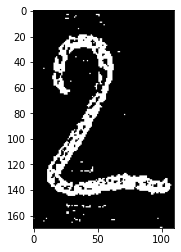

In [99]:
x1 = 360
x2 = 470
y1 = 270
y2 = 440

crop_digit_2 = digits_bit[y1:y2, x1:x2]

plt.imshow(crop_digit_2, cmap= 'binary') 
plt.show()

Continuing on with cropping of individual digits:

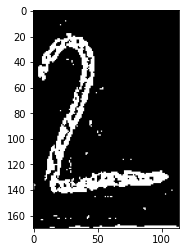

In [100]:
x1 = 466
x2 = 580
y1 = 270
y2 = 440

crop_digit_3 = digits_bit[y1:y2, x1:x2]

plt.imshow(crop_digit_3, cmap= 'binary') 
plt.show()

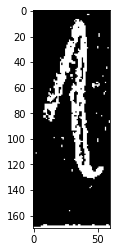

In [101]:
x1 = 580
x2 = 640
y1 = 270
y2 = 440


crop_digit_4 = digits_bit[y1:y2, x1:x2]

plt.imshow(crop_digit_4, cmap= 'binary') 
plt.show()

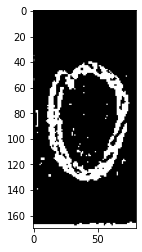

In [102]:
x1 = 640
x2 = 720
y1 = 270
y2 = 440


crop_digit_5 = digits_bit[y1:y2, x1:x2]

plt.imshow(crop_digit_5, cmap= 'binary') 
plt.show()

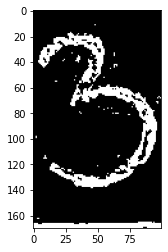

In [103]:
x1 = 720
x2 = 820
y1 = 270
y2 = 440


crop_digit_6 = digits_bit[y1:y2, x1:x2]

plt.imshow(crop_digit_6, cmap= 'binary') 
plt.show()

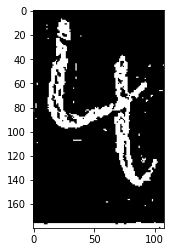

In [104]:
x1 = 820
x2 = 928
y1 = 260
y2 = 440

crop_digit_7 = digits_bit[y1:y2, x1:x2]

plt.imshow(crop_digit_7, cmap= 'binary') 
plt.show()

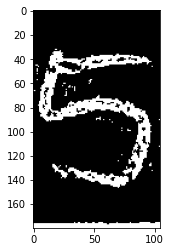

In [105]:
x1 = 925
x2 = 1030
y1 = 260
y2 = 440


crop_digit_8 = digits_bit[y1:y2, x1:x2]

plt.imshow(crop_digit_8, cmap= 'binary') 
plt.show()

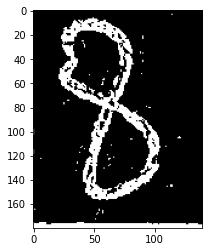

In [106]:
x1 = 1030
x2 = 1170
y1 = 260
y2 = 440


crop_digit_9 = digits_bit[y1:y2, x1:x2]

plt.imshow(crop_digit_9, cmap= 'binary') 
plt.show()

To check which format the cropped images belong to, and what their dimensions are:

In [107]:
type(crop_digit_9)

numpy.ndarray

In [108]:
crop_digit_9.shape

(180, 140)

## Resizing of images

To obey the principle of how original MNIST dataset images have been formatted, these handwritten photos of the student ID must be resized into 28x28. 

A list was made to hold all the individual digit photos:

In [109]:
student_data = [crop_digit_1, crop_digit_2, crop_digit_3, crop_digit_4, crop_digit_5, crop_digit_6, crop_digit_7, crop_digit_8, crop_digit_9]

In [110]:
type(student_data)

list

In order to structure each image as was done in the MNIST dataset, each element of the list has been resized to 28x28 format by a function with a for loop.

In [111]:
def resize_digits(arrays_list):
    
    digits_resized=[]
    
    for i in student_data:
        i_resized = cv.resize(i, (28,28))
        digits_resized.append(i_resized)
        
    return digits_resized

In [112]:
digits_resized = resize_digits(student_data)

To verify that resizing the arrays into 28x28 worked:

In [113]:
for i in digits_resized:
    print(i.shape)

(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)


## Conversion to numpy array class

In [114]:
type(digits_resized)

list

Considering that the above is still a list, a conversion of the list 'digits_resized' to a numpy array needs to be executed to conform to the structure of the original MNIST data:

In [115]:
student_data = np.array(digits_resized)

To verify that the handwritten digits of the student ID have been stored properly as a numpy array:

In [116]:
type(student_data)

numpy.ndarray

Since the labels of the images of digits written as the student ID are already know, they can be encoded in a list:

In [117]:
student_labels = [1,2,2,1,0,3,4,5,8]

However, to follow the convention of the original MNIST data, the list must be converted into the class of array:

In [118]:
student_labels = np.array(student_labels)

In [119]:
type(student_labels)

numpy.ndarray

Furthermore, the input data should be normalized within the interval between 0 and 1:

In [120]:
student_data = student_data / 255.0

Now that the array has been normalized, the 0's represent the white pixels (background) and greater than zero are black pixels (handwritten digits).

In [121]:
student_data[0][10]

array([1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       0.50196078, 1.        , 0.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        ])

As a verification step, some of the digits have been shown as well as their labels.

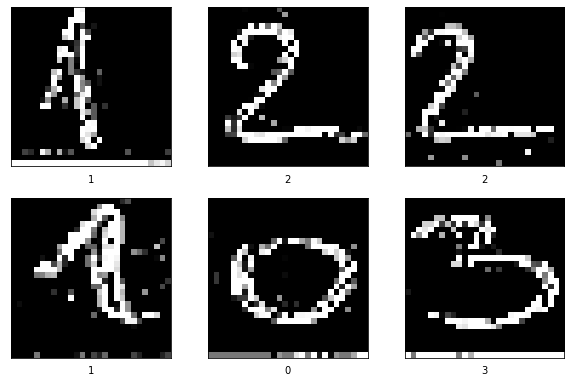

In [122]:
plt.figure(figsize=(10,10))
for i in range(6):
    plt.subplot(3,3,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(student_data[i], cmap=plt.cm.binary)
    plt.xlabel(student_labels[i])

## Building, compilation and evaluation of the model 

The following steps mimic what was done in part Q1a.

In [123]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

In [124]:
model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_8 (Flatten)         (None, 784)               0         
                                                                 
 dense_24 (Dense)            (None, 128)               100480    
                                                                 
 dense_25 (Dense)            (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [125]:
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy',
              # loss = 'mean_squared_error'
              metrics=['accuracy'])

In [126]:
model.fit(student_data, student_labels, epochs=5)

Epoch 1/5
1/1 [==============================] - 0s 303ms/step - loss: 2.8195 - accuracy: 0.1111
Epoch 2/5
1/1 [==============================] - 0s 31ms/step - loss: 1.9251 - accuracy: 0.2222
Epoch 3/5
1/1 [==============================] - 0s 21ms/step - loss: 1.7357 - accuracy: 0.2222
Epoch 4/5
1/1 [==============================] - 0s 11ms/step - loss: 1.5122 - accuracy: 0.3333
Epoch 5/5
1/1 [==============================] - 0s 15ms/step - loss: 1.3174 - accuracy: 0.6667


In [127]:
test_loss, test_acc = model.evaluate(student_data, student_labels)

print('Test accuracy:', test_acc)


1/1 [==============================] - 0s 135ms/step - loss: 1.1235 - accuracy: 0.7778
Test accuracy: 0.7777777910232544


The performance achieved on the student data, as measured by loss and accuracy, are worse than that in part Q1 a).

It seems that the student data is not fit to be predicted using the model trained on the training examples. 

It is true that the model has not seen the student data during training, meaning it was not optimized for the data. 

However, as there is a big loss from evaluation of student data, this suggests a difficulty with the model's ability to generalize on new data. 

With this size of the loss, the network is relatively bad at modeling the relationship between the input data and the output.

To plot visually the classification of each sample in the student data: 

In [128]:
predictions = model.predict(student_data)

1/1 [==============================] - 0s 42ms/step


In [129]:
def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array, true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel("{} {:2.0f}% ({})".format(predicted_label,
                                100*np.max(predictions_array),
                                true_label),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array, true_label[i]
    plt.grid(False)
    plt.xticks(range(10))
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)

    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')


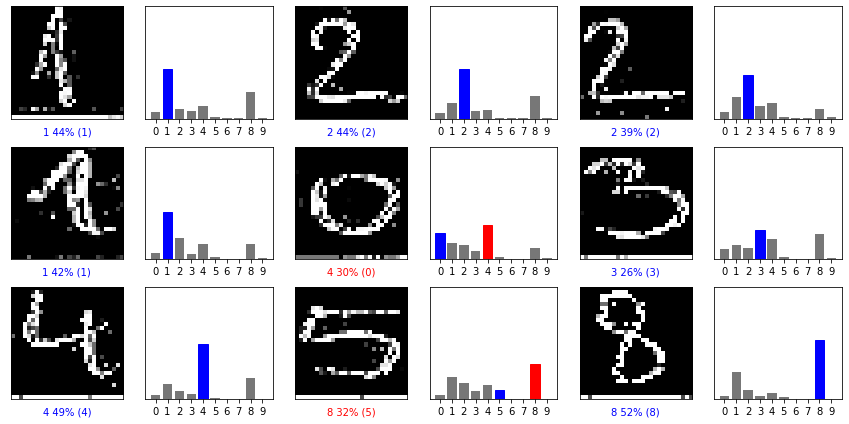

In [130]:
offset= 0
num_rows = 3
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i+offset, predictions[i+offset], student_labels, student_data)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(i+offset, predictions[i+offset], student_labels)
plt.tight_layout()
plt.show()


As can be seen above, most of the digits have been classified with relatively low accuracy.

# Q2 The Reuters newswire data

(10 points)

Consider the data in  `tensorflow.keras.datasets.reuters` and train a network which reliably categorizes the newswires.  

Hints: 
- some general explanations of all the datasets included in Keras is here: https://keras.io/datasets/
After `from tensorflow.keras.datasets import reuters` you can get the dataset and the word index with through `reuters.get_word_index()` and `reuters.load_data()`.  The training labels correspond to different topics for each newswire.  The list of topics can be found here: https://github.com/keras-team/keras/issues/12072. 
- Always look at your data, before you feed it into a network!
- Coherence of presentation is key.  Provide explanations of what you are doing and why you are doing it. 
- Note that it is expected and allowed to obtain inspiration for solving this task from the Internet. However, all sources need to be clearly cited!  
- Provide coherent explanations on what improves performance or not. 
- Code without explanation will not yield points. 



## Loading, overview and pre-processing data

Loading Reuters dataset directly from Tensorflow with a restriction on the 10,000 most frequent words.

Since input has been restricted to 10,000, then each newswire will be represented by a vector of 10 000 features

In [64]:
reuters = keras.datasets.reuters
(train_data, train_labels), (test_data, test_labels) = tf.keras.datasets.reuters.load_data()

To get an overview of the size of the training VS test sets:

In [65]:
train_data.shape, type(train_data)

((8982,), numpy.ndarray)

In [66]:
test_data.shape, type(test_data)

((2246,), numpy.ndarray)

In [67]:
np.max(train_labels)

45

One can see that the training dataset is an array of 8982 elements, while the test set has 2246.
In total the Reuters dataset has 11,228 newswires.

There are 0-45 (i.e. 46) categories which a newswire can be classified as. Each data point (i.e. newswire) can be classified into one category, therefore this is a single-label, multiclass classification.

Acessing a single newswire below:

In [68]:
train_data[20]

[1,
 779,
 37,
 38,
 465,
 278,
 6623,
 55,
 900,
 6,
 18215,
 172,
 4,
 19941,
 13885,
 66,
 474,
 10,
 920,
 24,
 41,
 6432,
 9691,
 1333,
 136,
 4,
 37,
 38,
 309,
 2276,
 198,
 2020,
 364,
 2061,
 6,
 439,
 2249,
 1327,
 5,
 37,
 38,
 465,
 247,
 348,
 4,
 460,
 356,
 990,
 1589,
 8,
 136,
 1053,
 3373,
 634,
 330,
 116,
 2061,
 1185,
 6,
 15436,
 198,
 236,
 1176,
 6,
 3037,
 6448,
 1693,
 238,
 1720,
 990,
 309,
 415,
 265,
 5992,
 8945,
 1149,
 9118,
 23,
 779,
 10,
 103,
 5,
 465,
 278,
 6623,
 7,
 42,
 1267,
 6,
 6432,
 4,
 3373,
 7,
 269,
 10,
 583,
 43,
 6,
 2070,
 1762,
 6,
 30,
 3069,
 13,
 4,
 1185,
 199,
 8,
 4,
 6623,
 348,
 990,
 313,
 415,
 265,
 6016,
 5731,
 1149,
 7108,
 9816,
 29875,
 1149,
 10600,
 1460,
 13446,
 1149,
 16207,
 1251,
 13128,
 1149,
 10600,
 9,
 15861,
 10621,
 1324,
 6131,
 75,
 91,
 10269,
 172,
 4,
 66,
 474,
 10,
 1220,
 6,
 6592,
 1968,
 398,
 9,
 2841,
 22,
 342,
 203,
 4,
 1220,
 6132,
 27,
 2953,
 2412,
 11428,
 1324,
 2775,
 41,
 6717,
 4

## Making sense of the numbers

Since each word is encoded as a number, it is useful to perform get_word_index() to receive a dictionary which maps words to their index within the Reuters dataset.

In [69]:
word_index = reuters.get_word_index()

In [70]:
type(word_index), len(word_index)

(dict, 30979)

It appears that word_index is a dictionary which contains 30,980 (because Python starts the count at 0) elements, i.e. there's 30,980 different words in the dataset, each with its own index number.

This way, one can know which number corresponds to which word by accessing the dictionary contents via:

In [71]:
word_index.items()

dict_items([('mdbl', 10996), ('fawc', 16260), ('degussa', 12089), ('woods', 8803), ('hanging', 13796), ('localized', 20672), ('sation', 20673), ('chanthaburi', 20675), ('refunding', 10997), ('hermann', 8804), ('passsengers', 20676), ('stipulate', 20677), ('heublein', 8352), ('screaming', 20713), ('tcby', 16261), ('four', 185), ('grains', 1642), ('broiler', 20680), ('wooden', 12090), ('wednesday', 1220), ('highveld', 13797), ('duffour', 7593), ('0053', 20681), ('elections', 3914), ('270', 2563), ('271', 3551), ('272', 5113), ('273', 3552), ('274', 3400), ('rudman', 7975), ('276', 3401), ('277', 3478), ('278', 3632), ('279', 4309), ('dormancy', 9381), ('errors', 7247), ('deferred', 3086), ('sptnd', 20683), ('cooking', 8805), ('stratabit', 20684), ('designing', 16262), ('metalurgicos', 20685), ('databank', 13798), ('300er', 20686), ('shocks', 20687), ('nawg', 7972), ('tnta', 20688), ('perforations', 20689), ('affiliates', 2891), ('27p', 20690), ('ching', 16263), ('china', 595), ('wagyu', 

Each key-value pair is represented with a word as a key, and a number (that encodes that word) as the value.

The number also corresponds to the overall frequency of that word within the dataset. In the example given below, 'june' with a value of 249 is the 250th (due to count start at 0) most frequent word in the data.

In [72]:
word_index['june']

249

The encoding is shifted by 3 since 0,1,2 have special meanings; therefore it is necessary to adjust for this.

In [73]:
for k in word_index:
    word_index[k] += 2
word_index["<PAD>"] = 0 #signifies which word has been padded
word_index["<START>"] = 1 #point out where the newswire begins
word_index["<UNK>"] = 2  #unknown i.e. it wasn't loaded in within the set of the 10,000 most frequent words

As the word_index dictionary is unable to immediately translate words from numbers, one must create a reverse_word_index. In it, number is the key, while word is the associated value. 

The reverse dictionary and a way to decode all the words from numbers within a newswire can be enveloped into a function:

In [74]:
def decode_news(encoded_news):
    
    reverse_word_index = {word_index[k]:k for k in word_index}
    
    return " ".join(reverse_word_index.get(k, '?') for k in encoded_news)

It should be noted that '?' is used as a placeholder when the function iterates over a number which doesn't exist in the dictionary - the unknown word gets replaced with ?

To monitor how the pre-processing of data is progressing, a newsire with index 20 is called:

In [75]:
decode_news(train_data[20]), train_labels[20]

("<START> mine s net adjusted 40 696 lt manufacturing in alliance's officials of demolished tricks share point mln mining its an 599 devalue stable all of s net stake circumstances sources published 26 fairchild in 29 carried o to s net adjusted federal estimated of might coffee able african and all drilling utilization 85 yesterday over fairchild principle in shultz's sources ec released in fitzwater guide excluding money strategic able stake bid higher greenmail polypropylene northern drink that mine mln february to adjusted 40 696 said as specific in 599 of utilization said acquisition mln final 5 in duties voted in with tried vs of principle agreed and of 696 estimated able same bid higher yielded denominations northern sticking mad penalities northern trico governor courted northern beutel try beaumont northern trico a reconvenes shortfalls restated sponsored market after chose officials of share point mln activity in 786 status corn a restore is make central of activity filings a

Both the decoded newswire (train_data[20]) and its label (train_labels[20]) are called as to be able to observe the text content and the label it is associated with - Newswire with index 20 has the topic label of 11.

## Further processing of data

Before feeding the data into the network, it needs to be further processed. 

First and foremost, it is benefitial to reduce the number of words to 10,000 most frequent, as 30,980 is a bit redundant. 

In [76]:
reuters = keras.datasets.reuters

vocab_size = 10000

(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words = vocab_size)

Next, given that each of the newswires called are of different length, it is useful to standardize the data by cutting the longer and expanding the shorter newswires through the built-in padding function:

In [77]:
train_data = keras.preprocessing.sequence.pad_sequences(train_data, value=word_index["<PAD>"], padding='post', maxlen=256)

test_data = keras.preprocessing.sequence.pad_sequences(test_data, value=word_index["<PAD>"], padding='post', maxlen=256)

As the size of the newswire is limited to a maximum length of 256 words, this means that in the longer newswires the last 256 words will be considered, while in the shorter ones the remainder of the newswire will be padded up to the length of 256. 

#To confirm that the padding was successful, the command below shows how the training set is now an array of 8982 newswires with 256 words (features).

In [78]:
type(train_data), train_data.shape

(numpy.ndarray, (8982, 256))

In [79]:
type(train_labels), train_labels.shape

(numpy.ndarray, (8982,))

## Vectorization of labels

As there are 46 labels in the dataset, it is important to vectorize them as well. This is possible to achieve via one-hot encoding as was seen in L03.

{cite: https://www.tensorflow.org/api_docs/python/tf/keras/utils/to_categorical}

In [80]:
from tensorflow.keras.utils import to_categorical

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)


Now the label data is converted into categorical arrays, where each array is a sequence of 0's and one 1 with a length of 46.
##For example, train_labels[5] is a one hot encoded vector with 0s and one 1--> the one 1 specifies the label (category) that newswire (train_data[5]) is classified as, so train_data[5] has label of index 4 (WTF??) if in the train_labels[5] vector, index 4(??) has a 1 in the given series of 0's.

In [81]:
train_labels[5]

array([0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [82]:
train_labels.shape, test_labels.shape

((8982, 46), (2246, 46))

Above is the verification on whether the processing of training and testing labels worked.

## Different approach to vectorizing remaining data

Before feeding data into the neural network, each newswire needs to be converted into a vector; one hot encoding transforms categorical features to a format that works better with machine learning algorithms. 
However, as taught in L04 'one-hot embedding... In our example of a N=10000 word dictionary, the resulting vector would be 10000 dimensional. This is not very efficient in practice, since it leads to very large high-dimensonal input vectors'

Therefore, a different approach utilizing embedding layers has been considered for the network architecture.  

## Build of the model

In [83]:
vocab_size = 10000

model = keras.Sequential()
model.add(keras.layers.Embedding(vocab_size, 64))
model.add(keras.layers.GlobalAveragePooling1D())
model.add(keras.layers.Dense(64, activation=tf.nn.relu)) 
#rule of thumb in a categorical problem with k classes is that intermediate layers shouldn't have fewer than k nodes
model.add(keras.layers.Dense(46, activation=tf.nn.softmax))

model.summary()


Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 64)          640000    
                                                                 
 global_average_pooling1d (G  (None, 64)               0         
 lobalAveragePooling1D)                                          
                                                                 
 dense_22 (Dense)            (None, 64)                4160      
                                                                 
 dense_23 (Dense)            (None, 46)                2990      
                                                                 
Total params: 647,150
Trainable params: 647,150
Non-trainable params: 0
_________________________________________________________________


The understanding of the newswires, as with any text, relies on the relationship between words to extract meaning from the content. To be able to reflect the semantics of words in text, words are encoded in 'embedding vectors'. 
Namely, the embedding layer maps each integer representing a word in the vocabulary to a 64-dimensional vector. The output shape is (8982,254,64), as there are 8982 newswires consisting of 254 words each, where each word is mapped to a 64-dimensional vector.
Through training, the network learns to associate similar words based on their context considering that their embedding vectors are near each other in vector space if they're similar, and farther apart if not. 

The size of the embedding vector was chosen to be d = 64, as the value from L04 (i.e. 16) considers a 16-dimensional space which may be too limited to learn to separate 46 different classes, running the risk of losing important information. Therefore the embedding layer has a total of 640000 parameters to be trained.

After the embedding layer, each newswire has been converted to a 256x64 dimensional vector.

The GlobalAveragePooling1D layer is necessary to take the embedding vectors and average each, this way 'shrinking' them into size of 1×1×d, with d being the vector size specified in the embedding layer i.e. 64. Esentially, a scalar is returned for each word, hence the output shape (8982, 254), with 8982 being the number of newswires and 254 the average values for of each word.
It not have any parameters that need to be trained and its output can be fed into the next layer.  

Each of the 64 nodes in the Dense layer uses the ReLU activation function to process the output from the nodes of the previous layer. The dense layer looks for patterns of words, as aided by the 'context learning' from the embedding layer, and tries to further aid the classification process. 

Final output layer should have a number of nodes equal to numer of classes (labels), as there are 46 possible categories that each newswire can be classified into. 
With the softmax function specified, the output will be a probability vector. This probability vector gives the probability with which the chosen newswire belongs to any of the labels, with its sum being 1. The label with the highest probability will be the category (i.e.) label which the newswire will be classified into. 

{cite:http://rstudio-pubs-static.s3.amazonaws.com/377865_28b2ad735373483c81a0a86ec8b3f94e.html}

{cite: https://stackoverflow.com/questions/70561374/whats-the-output-of-an-embedding-layer-in-tensorflow-and-what-does-globalaverag}

## Compilation of model

In [84]:
model.compile(optimizer=tf.optimizers.Adam(), 
              loss='categorical_crossentropy', #appropriate for multiclass categorical problems
              metrics=['acc'])

## Split of the dataset for validation

It is useful to monitor the performance of the model throughout its training (for each epoch). Considering that the test dataset is hidden until the final training performance of the model needs to be evaluated, it is useful to divide the training set into 2 batches- the training set and the validation set.

In [85]:
train_data.shape

(8982, 256)

In [86]:
test_data.shape

(2246, 256)

So the training set has 8982 samples (newswires), it's roughly 80% of the entire dataset.
Therefore the keras dataset has been processed in such a way that 80% of the dataset is for training and 20% for testing. 
Following the principle covered in L04, out of 25k samples in the testing set, 10k was picked for the validation set i.e. 40% of the training set. The same logic is applied here:
40% of 8982 is 3592.8 so ~3593

In [87]:
train_N = 3593 

x_val = train_data[:train_N]
partial_x_train = train_data[train_N:]

y_val = train_labels[:train_N]
partial_y_train = train_labels[train_N:]

## Training of the model

In [88]:
history = model.fit(partial_x_train, partial_y_train, epochs= 20, 
                    batch_size= 32, validation_data=(x_val, y_val), verbose=1)

Epoch 1/20
169/169 [==============================] - 7s 37ms/step - loss: 2.7078 - acc: 0.3546 - val_loss: 2.2289 - val_acc: 0.3799
Epoch 2/20
169/169 [==============================] - 6s 35ms/step - loss: 2.0438 - acc: 0.4238 - val_loss: 1.9482 - val_acc: 0.4826
Epoch 3/20
169/169 [==============================] - 6s 33ms/step - loss: 1.7637 - acc: 0.5476 - val_loss: 1.7279 - val_acc: 0.5775
Epoch 4/20
169/169 [==============================] - 5s 32ms/step - loss: 1.5713 - acc: 0.6235 - val_loss: 1.6159 - val_acc: 0.6095
Epoch 5/20
169/169 [==============================] - 5s 32ms/step - loss: 1.4584 - acc: 0.6534 - val_loss: 1.5479 - val_acc: 0.6354
Epoch 6/20
169/169 [==============================] - 6s 34ms/step - loss: 1.3515 - acc: 0.6808 - val_loss: 1.4708 - val_acc: 0.6538
Epoch 7/20
169/169 [==============================] - 6s 33ms/step - loss: 1.2374 - acc: 0.7022 - val_loss: 1.3930 - val_acc: 0.6696
Epoch 8/20
169/169 [==============================] - 6s 33ms/step - 

Results of the model.fit() are stored in the history variable from which several parameters can be accessed:

-'loss' as cost function values computed at each epoch on training set

-'acc' as the classification accuracy at each epoch computed using training data

-'val_acc' as the classification accuracy at each epoch computed using validation data

-'val_loss' as cost function values computed on validation set

In [89]:
history_dict = history.history

acc = history_dict['acc']
val_acc = history_dict['val_acc']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = history.epoch

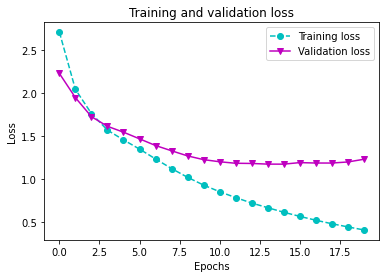

In [90]:
#plots of training loss and the validation loss

#"co--" is for "cyan circle dashed line"
plt.plot(epochs, loss, 'co--', label='Training loss')
# 'mv' is for "solid magenta line with triangles"
plt.plot(epochs, val_loss, 'mv-', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

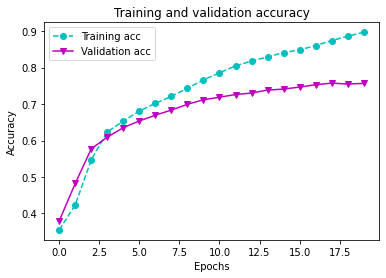

In [91]:
# plots of the accuracies for training and validation data.
plt.plot(epochs, acc, 'co--', label='Training acc')
plt.plot(epochs, val_acc, 'mv-', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()


## Evaluating model on test data

In [92]:
model.evaluate(test_data, test_labels)

71/71 [==============================] - 1s 10ms/step - loss: 1.2613 - acc: 0.7431


[1.261332392692566, 0.7430988550186157]

The overall performance of the model on unseen test data is such that loss is 1.6507 and its accuracy is 75.02%.

The percentage of images correctly labelled is relatively high with 75.02%. However, there is a fairly large loss value, and the difference between the test and training loss indicates a problem with the model's ability to generalize on new data.